Loan SARAZIN & Anna MARIZY

# Simulations de Variables Aléatoires

## Générateur fondé sur l’inverse généralisée

In [1]:
import time
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

import scipy.stats as ss
#from scipy.stats import uniform
#from scipy.stats import expon

In [2]:
def generalized_inverse(invF, n) :
    """Génère n échantillons selon la densité f = invF en utilisant l'inverse généralisé
    
    Args:
        invF (IDK): Inverse de la fonction de répartition
        n (int): Sample size wanted
        
    Returns:
        array: Array of n samples
    """
    u = ss.uniform.rvs(loc=0, scale=1, size=n)
    return invF(u)

Soit $X$ une variable aléatoire suivant une loi exponentielle de paramètre $\lambda$. Sa fonction de répartition est :
$$F(x)=1-\exp(-\lambda x)$$
L'inverse généralisé de $F$ est :
$$F^{-1}(u)=-\frac{1}{\lambda}\ln(1-u)$$

In [3]:
def invExp(u, Lambda) :
    return -np.log(1-u)/Lambda

Lambda = 2
nbEchantillon = 10000

x = generalized_inverse(lambda x : invExp(x, Lambda), nbEchantillon)

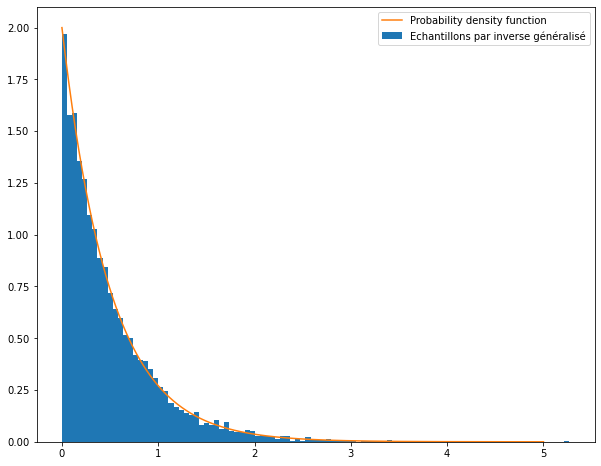

In [4]:
t = np.linspace(0, 5, 1000)
z = ss.expon.pdf(t, loc=0, scale=1/Lambda)

plt.figure(figsize=(10, 8))
plt.hist(x, bins=100, density=True, label='Echantillons par inverse généralisé')
plt.plot(t, z, label='Probability density function')
plt.legend()
plt.show()

Pour utiliser cet algorithme, il faut connaitre l'inverse généralisé de la fonction de répartition $F$, afin de générer
échantillon selon la densité $f(x)=F'(x)$.  
En pratique il n'est pas souvent possible d'accéder à cet inverse généralisé.

## Générateur Accept-Reject

In [5]:
def acceptReject(f, g, M, n) :
    """
    Génère un échantillon de variables aléatoires selon la densité f = invF en utilisant l'inverse généralisé
    
    Args:
        f (function) :
        g (funtion) :
        M (float) :
        n (int): Sample size wanted
        
    Returns:
        array: Array of n samples
    """
    X = []
    k = 0
    for i in range(n) :
        u = ss.uniform.rvs()
        x = g.rvs()
        while (f.pdf(x)/(M*g.pdf(x))) < u :
            u = ss.uniform.rvs(loc=0, scale=1)
            x = g.rvs()
            k += 1
        X.append(x)
    print(f"{k} échantillons ont été rejetés pour échantilloner {n} échantillons")
    return(np.array(X))

In [6]:
M = 5

X100 = acceptReject(ss.norm(loc=0, scale=1), ss.cauchy(loc=0, scale=1), M, 100)
X1000 = acceptReject(ss.norm(loc=0, scale=1), ss.cauchy(loc=0, scale=1), M, 1000)

335 échantillons ont été rejetés pour échantilloner 100 échantillons
3845 échantillons ont été rejetés pour échantilloner 1000 échantillons


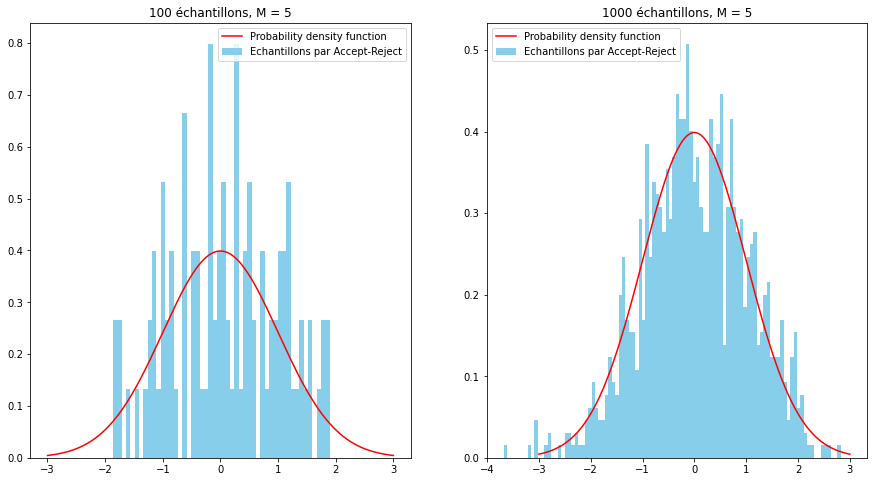

In [7]:
t = np.linspace(-3, 3, 1000)
z = ss.norm.pdf(t, loc=0, scale=1)

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(121)
ax1.hist(X100, bins=50, color="skyblue", density=True, label='Echantillons par Accept-Reject')
ax1.plot(t, z, color='r', label='Probability density function')
ax1.legend()
ax1.set_title(f"100 échantillons, M = {M}")

ax2 = fig.add_subplot(122)
ax2.hist(X1000, bins=100, density=True, color="skyblue", label='Echantillons par Accept-Reject')
ax2.plot(t, z, color='r', label='Probability density function')
ax2.legend()
ax2.set_title(f"1000 échantillons, M = {M}")
plt.show()

In [8]:
M = np.sqrt(2*np.pi/np.e)

X100 = acceptReject(ss.norm(loc=0, scale=1), ss.cauchy(loc=0, scale=1), M, 100)
X1000 = acceptReject(ss.norm(loc=0, scale=1), ss.cauchy(loc=0, scale=1), M, 1000)
X10000 = acceptReject(ss.norm(loc=0, scale=1), ss.cauchy(loc=0, scale=1), M, 10000)

53 échantillons ont été rejetés pour échantilloner 100 échantillons
527 échantillons ont été rejetés pour échantilloner 1000 échantillons
5114 échantillons ont été rejetés pour échantilloner 10000 échantillons


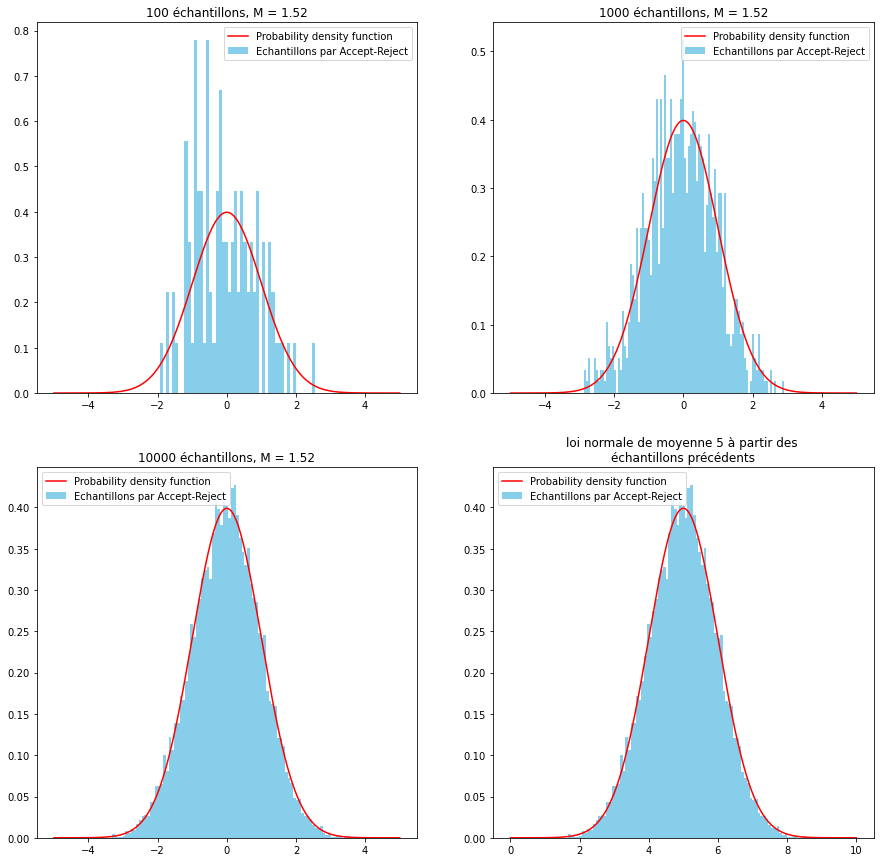

In [9]:
t = np.linspace(-5, 5, 1000)
z = ss.norm.pdf(t, loc=0, scale=1)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.hist(X100, bins=50, color="skyblue", density=True, label='Echantillons par Accept-Reject')
ax1.plot(t, z, color='r', label='Probability density function')
ax1.legend()
ax1.set_title(f"100 échantillons, M = {M:.2f}")

ax2 = fig.add_subplot(222)
ax2.hist(X1000, bins=100, density=True, color="skyblue", label='Echantillons par Accept-Reject')
ax2.plot(t, z, color='r', label='Probability density function')
ax2.legend()
ax2.set_title(f"1000 échantillons, M = {M:.2f}")

ax3 = fig.add_subplot(223)
ax3.hist(X10000, bins=100, density=True, color="skyblue", label='Echantillons par Accept-Reject')
ax3.plot(t, z, color='r', label='Probability density function')
ax3.legend()
ax3.set_title(f"10000 échantillons, M = {M:.2f}")

t = t + 5
z = ss.norm.pdf(t, loc=5, scale=1)

ax4 = fig.add_subplot(224)
ax4.hist(X10000 + 5, bins=100, color="skyblue", density=True, label='Echantillons par Accept-Reject')
ax4.plot(t, z, color='r', label='Probability density function')
ax4.legend()
ax4.set_title(f"loi normale de moyenne 5 à partir des \néchantillons précédents")
plt.show()

La méthode d'accept-reject permet bein d'échantilloner $X $suivant la densité $f(x)$, sachant que l'on connaît
une densité g(x) à partir de laquelle on sait échantillonner et qui est telle que :
$$f(x)\leq Mg(x)$$
Cependant, si $M$ n'est pas bien choisi, l'algorithme n'est pas optimal puisque $x$ est accepté avec une probabilité $\frac{1}{M}$. On voit de plus avec les histogrammes tracés ci-dessus qu'un nombre élevé d'échantillon est nécessaire pour que l'ensemble des échantillons approchent la densité de probabilité souhaitée.

A partir d'un nombre conséquent d'échantillons suivant une loi normale centrée réduite, obtenus aec la méthode d'accept-reject, il est facile de calculer 10000 échantillons distribués suivant une loi normale de moyenne 5.

## Méthode de Box-Muller pour des lois normales univariées

In [10]:
def boxMuller(n) :
    """Génère n échantillons à partir de la loi normale bivariée réduite
    
    Args:
        n (int): Sample size wanted
        
    Returns:
        array: Array of n samples
    """
    Z = []
    for i in range(n) :
        u1, u2 = ss.uniform.rvs(loc=0, scale=1, size=2)
        R, V = -2*np.log(u1), 2*np.pi*u2
        z1, z2 = np.sqrt(R)*np.cos(V), np.sqrt(R)*np.sin(V)
        Z.append([z1, z2])
    return(np.array(Z))

Lors de l'éxécution de la méthode de Box-Muller, on obtient deux échantillons qui suivent une loi normale univariée. 

In [11]:
nbEchantillon = 10000

Z = boxMuller(nbEchantillon//2)

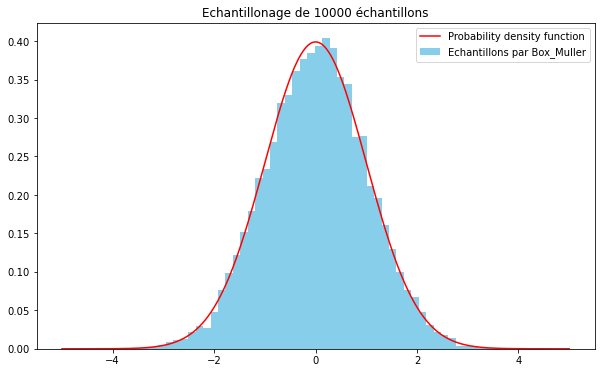

In [12]:
t = np.linspace(-5, 5, 1000)
z = ss.norm.pdf(t, loc=0, scale=1)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.hist(np.ravel(Z), bins=50, color="skyblue", density=True, label='Echantillons par Box_Muller')
ax1.plot(t, z, color='r', label='Probability density function')
ax1.legend()
ax1.set_title(f"Echantillonage de {nbEchantillon} échantillons")
plt.show()

Avec l'algorithme de Box-Muller, les échantillons obtenues coïcident avec la loi de probabilité cible. Cependant, cette méthode utilise des fonctions triginométriques squi sont coûteuses en temps de calcul pour un couple d'échantillons (cependant ce coût reste négligeable comparé à d'autres algorithmes comme accept-rejet par exemple). 

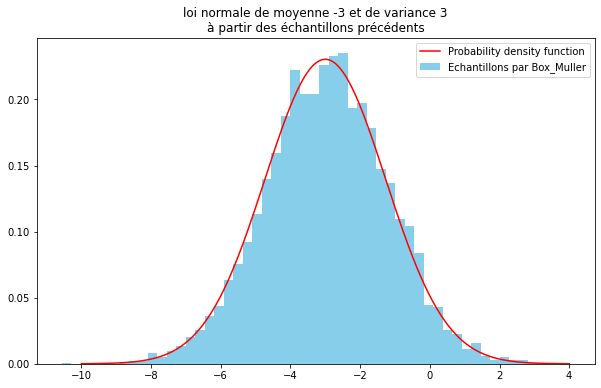

In [13]:
nbEchantillon = 5000
Z = boxMuller(nbEchantillon//2)

t = np.linspace(-10, 4, 1000)
z = ss.norm.pdf(t, loc=-3, scale=np.sqrt(3))

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.hist(np.ravel(Z*np.sqrt(3)-3), bins=50, color="skyblue", density=True, label='Echantillons par Box_Muller')
ax1.plot(t, z, color='r', label='Probability density function')
ax1.legend()
ax1.set_title(f"loi normale de moyenne -3 et de variance 3\nà partir des échantillons précédents")
plt.show()

## Générer des échantillons d’une loi normale multivariée

In [14]:
def multivarie(n, mu, sigma) :
    Ztot = []
    for i in range(n) :
        Z = np.reshape(boxMuller(mu.size//2), (mu.size, 1))
        A = la.cholesky(sigma)
        Ztot.append(mu + A @ Z)
    return(np.array(Ztot))

In [15]:
nbEchantillon = 1000
mu = np.array([[0], [50], [100], [-50], [-100], [200]])
sigma = np.array([[11, 10, 5, 9, 4, 2],
                [10, 13, 9, 15, 5, 3],
                [5, 9, 15, 11, 3, 1],
                [9, 15, 11, 21, 6, 4],
                [4, 5, 3, 6, 5, 1],
                [2, 3, 1, 4, 1, 1]])

Z = multivarie(nbEchantillon, mu, sigma)

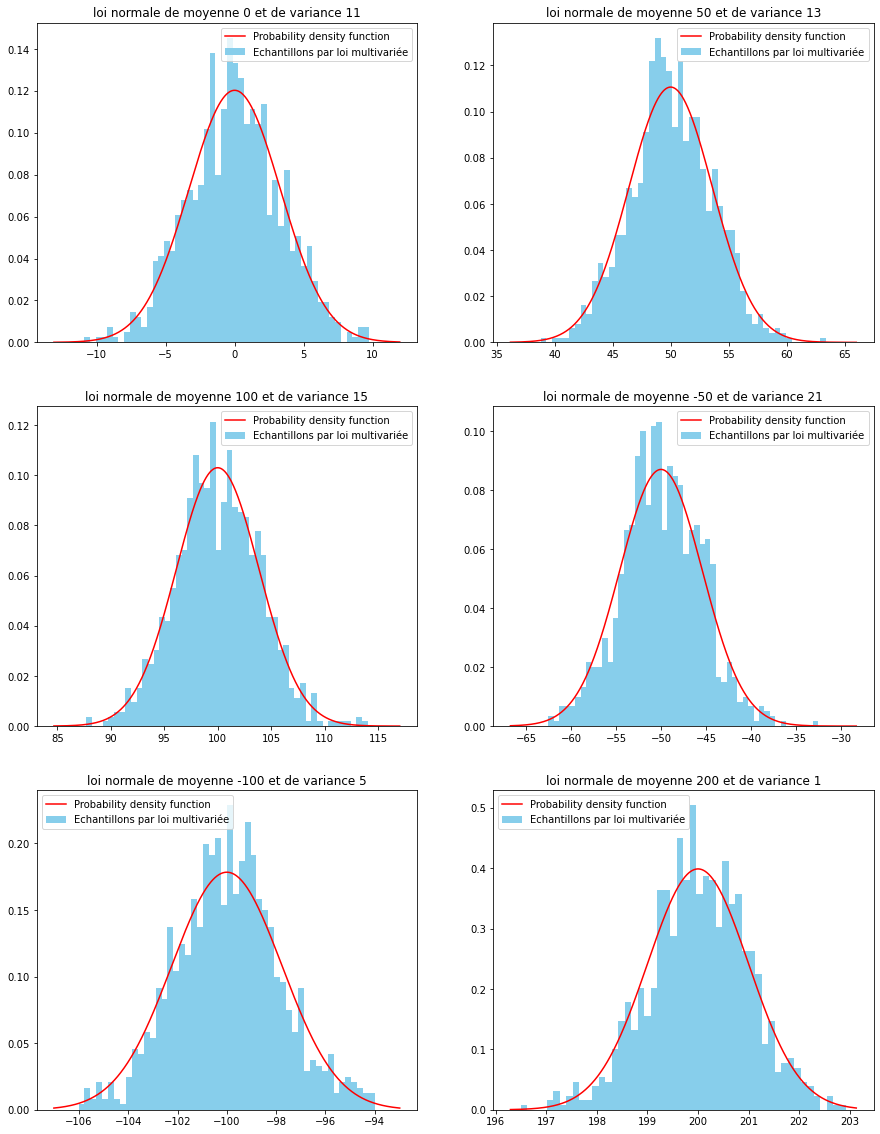

In [16]:
fig = plt.figure(figsize=(15, 20))
for i in range(mu.size) :
    t = np.linspace(np.min(Z[:, i]) - sigma[i][i]/5, np.max(Z[:, i]) + sigma[i][i]/5, 1000)
    z = ss.norm.pdf(t, loc=mu[i][0], scale=np.sqrt(sigma[i][i]))
    
    ax = fig.add_subplot(3, 2, i + 1)
    ax.hist(np.ravel(Z[:, i]), bins=50, color="skyblue", density=True, label='Echantillons par loi multivariée')
    ax.plot(t, z, color='r', label='Probability density function')
    ax.legend()
    ax.set_title(f"loi normale de moyenne {mu[i][0]} et de variance {sigma[i][i]}")
plt.show()

A expliquer

## Echantillonner suivant une loi de Bernouilli

In [17]:
def Binomial(n, p) :
    X = []
    for i in range(n) :
        u = ss.uniform.rvs(loc=0, scale=1)
        if u < p :
            X.append(0)
        else :
            X.append(1)
    return(np.array(X))

In [18]:
nbEchantillon = 1000
p = 0.7

Z = Binomial(nbEchantillon, 1 - p)

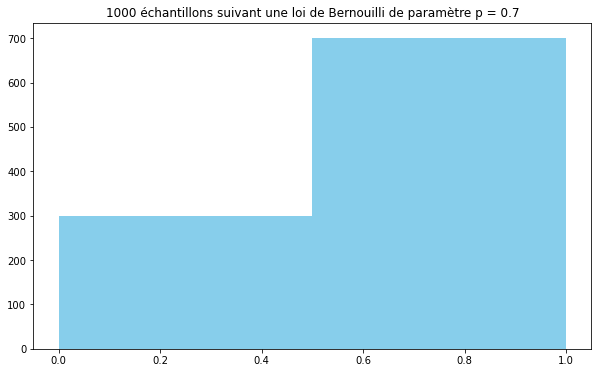

La fréquence de 0 dans cette série d'échantillons est de 0.3
La fréquence de 1 dans cette série d'échantillons est de 0.7


In [19]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.hist(Z, bins=2, color="skyblue", density=False)
ax1.set_title(f"{nbEchantillon} échantillons suivant une loi de Bernouilli de paramètre p = {p}")
plt.show()

n0 = (Z.size - np.count_nonzero(Z))/Z.size
n1 = (np.count_nonzero(Z))/Z.size
print(f"La fréquence de 0 dans cette série d'échantillons est de {n0}")
print(f"La fréquence de 1 dans cette série d'échantillons est de {n1}")

La fréquence de 0 dans l'échantillon généré est proche du paramètre de la loi de Bernoulli cible. Il faut cependant penser à faire attention au seuil utilisé dans l'algorithme. En effet, on veut que $Prob(U>1-p)=p$ pour que $P(X=1)=p)$.

## Algorithme de Metropolis-Hastings

### Influence du support de la loi de proposition

In [20]:
def MH_indep(f, q, nbEchantillon, nbBurn) :
    X = np.zeros(nbEchantillon)
    x = q.rvs()
    for t in range(nbEchantillon + nbBurn) :
        y = q.rvs()
        rho = min((f(y)*q.pdf(x))/(f(x)*q.pdf(y)), 1)
        u = ss.uniform.rvs(loc = 0, scale = 1)
        if u < rho :
            x = y
        if t >= nbBurn :
            X[t - nbBurn] = x
    return(X)

In [21]:
nbEchantillon = 20000
nbBurn = 500
q = ss.uniform(loc=-1, scale=2)
f = ss.norm(loc=0, scale=1).pdf

X = MH_indep(f, q, nbEchantillon, nbBurn)

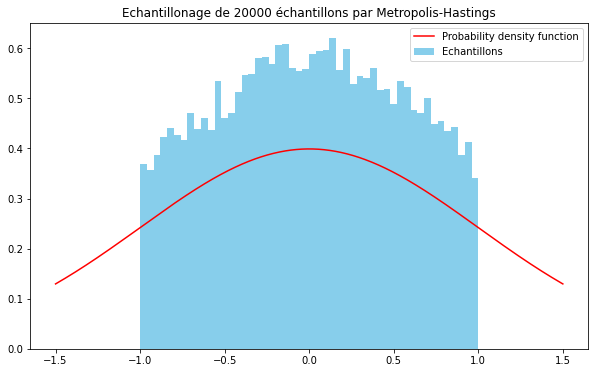

In [22]:
t = np.linspace(-1.5, 1.5, 1000)
z = f(t)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.hist(X, bins=50, color="skyblue", density=True, label='Echantillons')
ax1.plot(t, z, color='r', label='Probability density function')
ax1.set_title(f"Echantillonage de {nbEchantillon} échantillons par Metropolis-Hastings")
ax1.legend()
plt.show()

Comme une variable aléatoire suivant une loi normale centrée réduite prend des valeurs sur $\mathbb{R}$, et que lorsqu'on utilise loi de proposition une loi uniforme $\mathcal{U}[-1;1]$ toutes les valeurs possibles sont sur $[-1;1]$.

In [23]:
nbEchantillon = 20000
nbBurn1, nbBurn2 = 500, 1000
q1, q2 = ss.uniform(loc=-5, scale=10), ss.uniform(loc=-20, scale=40)
f = ss.norm(loc=0, scale=1).pdf

X1 = MH_indep(f, q1, nbEchantillon, nbBurn1)
X2 = MH_indep(f, q2, nbEchantillon, nbBurn2)

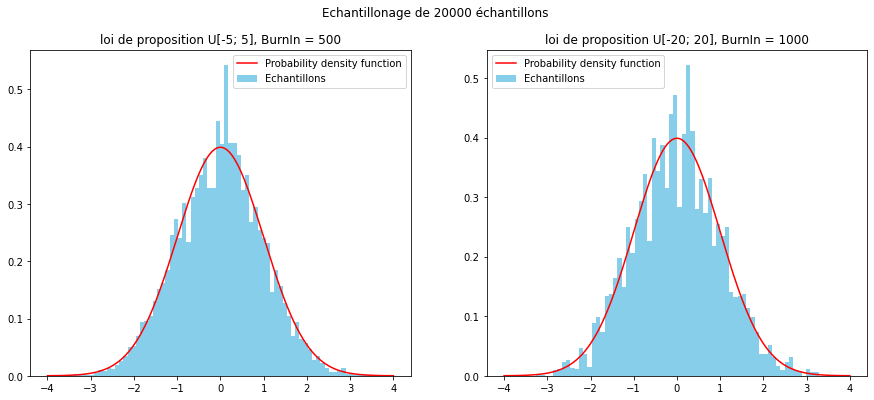

In [24]:
t = np.linspace(-4, 4, 1000)
z = f(t)

fig = plt.figure(figsize=(15, 6))
fig.suptitle(f"Echantillonage de {nbEchantillon} échantillons")
ax1 = fig.add_subplot(121)
ax1.hist(X1, bins=75, color="skyblue", density=True, label='Echantillons')
ax1.plot(t, z, color='r', label='Probability density function')
ax1.set_title(f"loi de proposition U[-5; 5], BurnIn = {nbBurn1}")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.hist(X2, bins=75, color="skyblue", density=True, label='Echantillons')
ax2.plot(t, z, color='r', label='Probability density function')
ax2.set_title(f"loi de proposition U[-20; 20], BurnIn = {nbBurn2}")
ax2.legend()
plt.show()

Si on augmente le nombre de BurnIn, on s'assure d'une meilleure convergence vers la loi cible. En revanche, si le nombre de BurnIn reste inchangé mais qu'on utilise une loi uniforme sur un intervalle plus grand, on voit que la 'convergence' est plus lente et que la simulation est moins précise.

Avec une loi de proposition prenant ses valeurs sur un intervalle contenant la majorité des valeurs prises par la loi cible, alors la suite d'échantillons obtenue se rapproche d'une suite de variables aléatoires de densité la loi cible.

### Echantillonner suivant une loi possédant deux modes

In [25]:
mu1, mu2 = 10, -5
a1, a2 = 1, 2
p = 0.3

def f(x) :
    return p*ss.laplace(loc=mu1, scale=a1).pdf(x) + (1-p)*ss.laplace(loc=mu2, scale=a2).pdf(x)

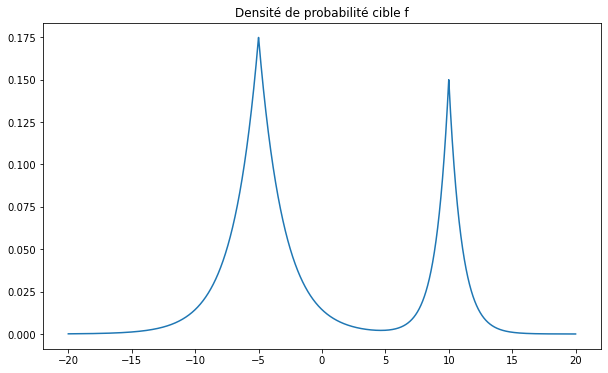

In [26]:
t = np.linspace(-20, 20, 10000)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.plot(t, f(t))
ax1.set_title('Densité de probabilité cible f')
plt.show()

In [27]:
nbEchantillon = 10000
nbBurn = 100
q = ss.norm(loc=0, scale=10)

t = time.time()
X = MH_indep(f, q, nbEchantillon, nbBurn)
print(time.time() - t, "s")

34.365851402282715 s


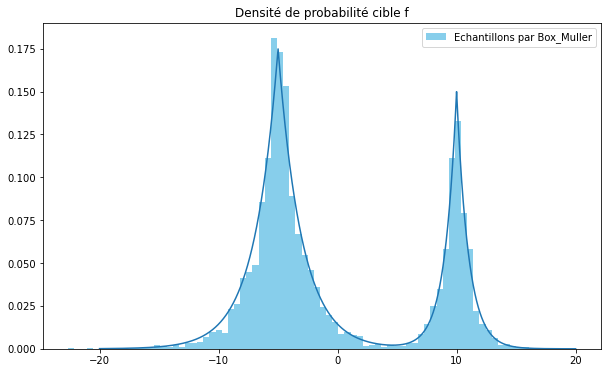

In [28]:
t = np.linspace(-20, 20, 10000)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.plot(t, f(t))
ax1.hist(X, bins=75, color="skyblue", density=True, label='Echantillons par Box_Muller')
ax1.set_title('Densité de probabilité cible f')
ax1.legend()
plt.show()

## Echantillonnage de Monte Carlo parfait

In [29]:
def get_part(f, nbPart=100) :
    moy = 0
    for _ in range(nbPart) :
        moy += f.rvs()
    return moy/nbPart

def echant_monte_carlo(f, nbEchantillon=1000, nbPart=100) :
    t = time.time()
    Vm = []
    for _ in range(nbEchantillon) :
        Vm.append(get_part(f, nbPart))
    Vm = np.array(Vm)
        
    fig = plt.figure(figsize=(15, 8))
    fig.suptitle(f'Moyennes de {nbEchantillon} échantillons de {nbPart} particules')
    ax1 = fig.add_subplot(121)
    ax1.plot(Vm, '.', label='Moyenne des échantillons')
    ax1.plot([0, nbEchantillon], [f.mean(), f.mean()], 'r-', label='Moyenne cible')
    ax1.legend()

    ax2 = fig.add_subplot(122)
    ax2.hist(Vm, bins=50, color="skyblue", 
             density=True)
    plt.show()
    print(f"Temps d'exécution : {time.time() - t:.4f} s")
    print(f"La moyenne de tous les échantillons est de {np.mean(Vm):.3f}")
    return Vm, np.mean(Vm)

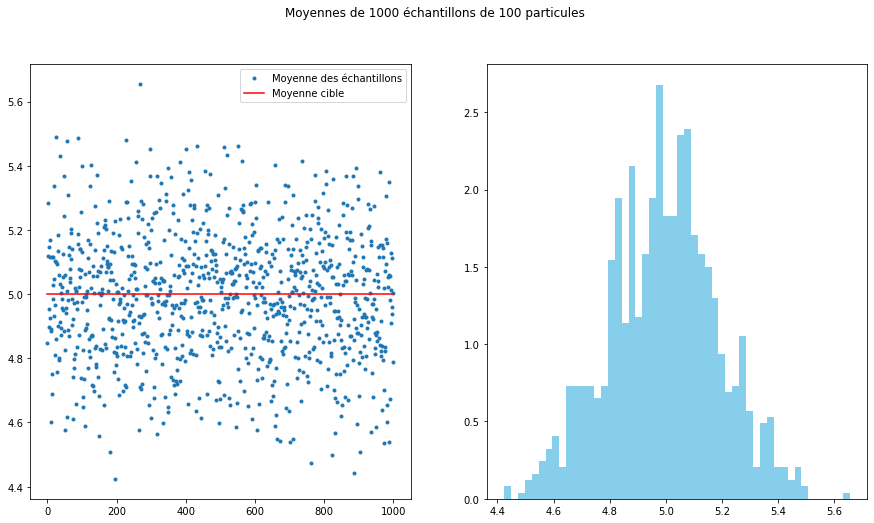

Temps d'exécution : 3.7321 s
La moyenne de tous les échantillons est de 4.991


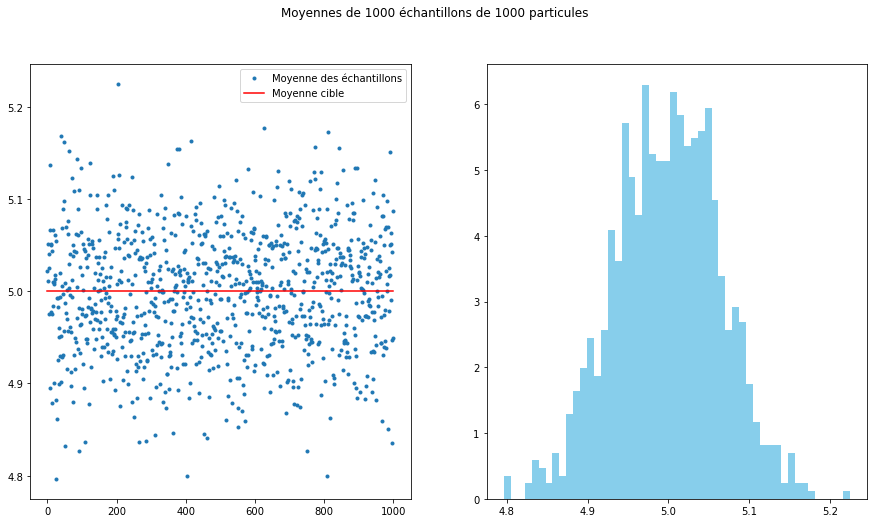

Temps d'exécution : 33.7568 s
La moyenne de tous les échantillons est de 4.999


In [30]:
f = ss.norm(loc=5, scale=2)

Vm1, m = echant_monte_carlo(f, nbEchantillon=1000, nbPart=100)
Vm2, m = echant_monte_carlo(f, nbEchantillon=1000, nbPart=1000)

In [31]:
Vm1

array([4.84732974, 5.11727636, 5.28506565, 5.14677698, 4.95408382,
       4.89691438, 5.11711841, 4.92505471, 5.16710993, 4.88529527,
       4.60103937, 4.89068679, 5.11434846, 4.68949768, 4.75121397,
       5.0284338 , 4.98501548, 5.11669582, 5.33688642, 5.04583551,
       4.93291918, 4.96582912, 4.81129862, 5.10190919, 5.1016162 ,
       5.4899766 , 4.86071714, 4.75799191, 5.09448183, 5.18567904,
       5.1331851 , 4.90011034, 4.80096837, 4.79327606, 5.06047666,
       4.91432236, 5.03307802, 5.43095417, 4.89340703, 4.87133925,
       5.00440673, 4.95743715, 4.98360513, 5.02212779, 5.05323917,
       4.94990654, 5.12511547, 5.24250935, 5.36831465, 4.88558275,
       5.05823193, 4.57626962, 4.82509333, 4.94260612, 4.95571053,
       4.61695575, 5.00926632, 5.47785495, 4.98297399, 5.30810139,
       4.88843735, 4.86926135, 5.12290249, 5.14737191, 5.03666969,
       5.07703481, 5.04888302, 5.20414822, 5.11070329, 5.19109444,
       4.98404473, 4.90395415, 5.13945653, 4.74099589, 4.92370

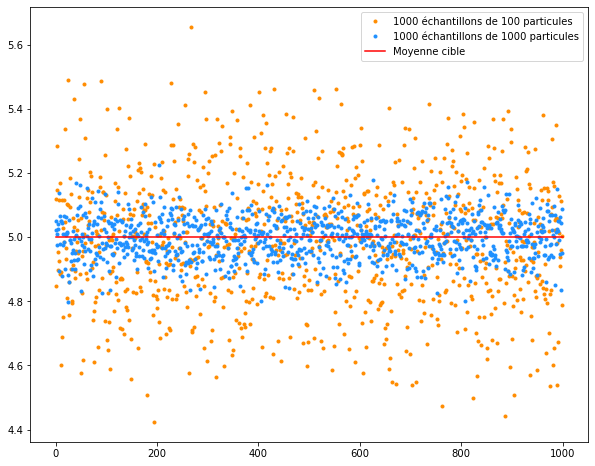

In [32]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)
ax1.plot(Vm1, '.', color='darkorange', label='1000 échantillons de 100 particules')
ax1.plot(Vm2, '.', color='dodgerblue', label='1000 échantillons de 1000 particules')
ax1.plot([0, 1000], [5, 5], 'r-', label='Moyenne cible')
ax1.legend()
plt.show()

Plus le nombre de particules est élevé pour calculer la moyenne empirique d'un échantillon, plus celle-ci sera proche de la moyenne cible. Ce résultat est confirmé par la loi forte des grand nombres.